
<h1> ________________________________________________________________________________________</h1>
<center>
<h1>Peluang dan Statistika - MATH1042</h1>
<h2>Project UAS 4C - Kelompok 3</h2>
    
<p style="font-size:21px;text-align: center;">Hitung Tekanan Beton</p>
</center>
<h1> ________________________________________________________________________________________</h1>


<b style="font-size:16px;">Anggota Kelompok :</b>

<ul>
    <li>Darren Nathaniel Rusly - 10101190104 - <a href="https://github.com/DarrenRusly">GitHub</a></li>
    <li>Felicia Yolanda - 10102190618 - <a href="https://github.com/feliciagrace23">GitHub</a></li>
    <li>Gracheilla A. S - 10103190598 - <a href="https://github.com/GracheillaAngel">GitHub</a></li>
    <li>Rivaldo Linogi - 10101190177 - <a href="https://github.com/rivaldopieter">GitHub</a></li>
    <li>Victor Chendra - 10101200338 - <a href="https://github.com/victorchendra02">GitHub</a></li>
</ul>
<br>

<h3>Latar Belakang </h3>
<p> Mencari hubungan relasi antara variabel komponen pembentuk dan kuat beton, serta melakukan prediksi untuk memperkirakan besar kuat beton yang <b> tidak diketahui data lengkapnya. </b></p>

In [2]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import t
from matplotlib.pyplot import figure

<h2> Kesimpulan dan Saran </h2>
<h1> ________________________________________________________________________________________ </h1>

In [3]:
#Memanggil data
dataset = pd.read_csv('Concrete_Data.csv')
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<h1> ________________________________________________________________________________________ </h1>
<h1>Tugas Pemograman</h1>
<h3>1. Grafik hubungan antara masing-masing komponen dengan kuat tekan beton</h3>
2. Mencari hubungan antara masing-masing pasangan komponen dengan Regresi<br>
3. Membuat inferensi statistika untuk membuat interval kepercataan koefision hasil regresi<br>
4. Membuat visualisasi data yang relevan dengan hasil yang diperoleh
<br><br><br>

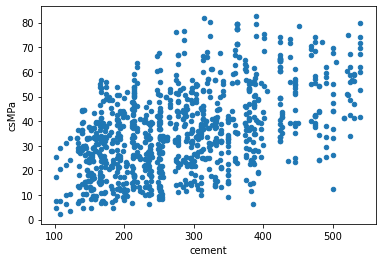

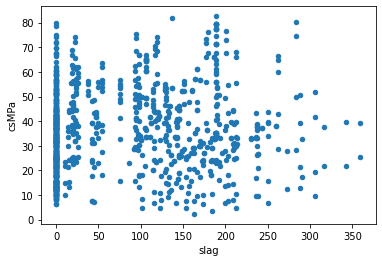

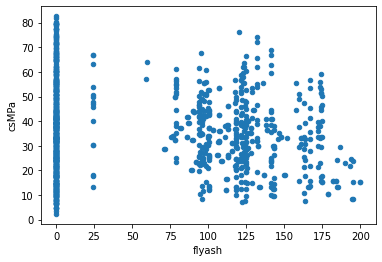

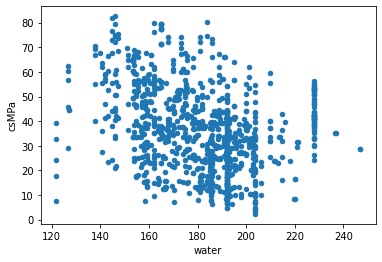

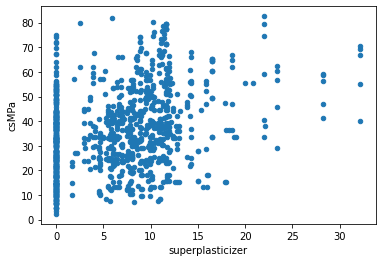

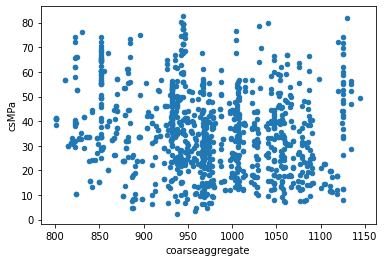

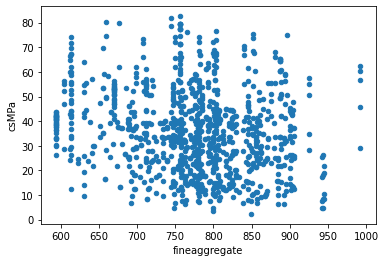

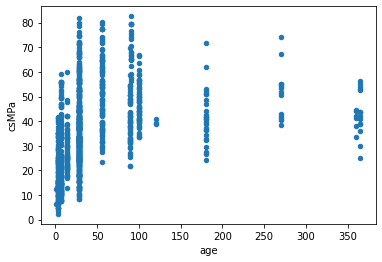

In [5]:
dataset.plot(kind='scatter', x='cement', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='slag', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='flyash', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='water', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='superplasticizer', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='coarseaggregate', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='fineaggregate', y='csMPa')
plt.show()

dataset.plot(kind='scatter', x='age', y='csMPa')
plt.show()

<h1> ________________________________________________________________________________________ </h1>
<h3>2. Mencari hubungan antara masing-masing pasangan komponen dengan Regresi</h3> 

In [6]:
dataset.corr()['csMPa'].sort_values(ascending=True)

water              -0.289633
fineaggregate      -0.167241
coarseaggregate    -0.164935
flyash             -0.105755
slag                0.134829
age                 0.328873
superplasticizer    0.366079
cement              0.497832
csMPa               1.000000
Name: csMPa, dtype: float64

In [7]:
def calculate_sxx(x, x_mean):
    sxx = 0
    for i in x:
        equation = (i - x_mean)**2
        sxx += equation
    return sxx

def calculate_syy(y, y_mean):
    syy = 0
    for i in y:
        equation = (i - y_mean)**2
        syy += equation
    return syy

def calculate_syy_hat(y, y_hat):
    syy_hat = 0
    for i in range(len(y)):
        equation = (y[i] - y_hat[i])**2
        syy_hat += equation
    return syy_hat

def calculate_sxy(x, x_mean, y, y_mean):
    sxy = 0
    for i in range(len(x)):
        equation = (x[i]-x_mean)*(y[i]-y_mean)
        sxy += equation
    return sxy


def calculate_b1(sxy, sxx):
    b1 = sxy/sxx
    return b1

def calculate_b0(x_mean, y_mean, b1):
    b0 = y_mean - (b1*x_mean)
    return b0

def calculate_s(x, y, syy, sxy, b1):
    n = x.size
    s2 = (syy - (b1*sxy))/(n-2)
    s = math.sqrt(s2)
    return s

def calculate_r2(syy_hat, syy):
    r2 = 1 - (syy_hat/syy)
    return r2
    
def calculate_slopemargin(t_value, s, sxx):
    slope_margin = t_value * (s/math.sqrt(sxx))
    return slope_margin

def calculate_interceptmargin(n, x, t_value, s, sxx):
    x2 = x**2
    sum_x2 = x2.sum()
    intercept_margin = t_value * (s/math.sqrt(n*sxx)) * math.sqrt(sum_x2)
    return intercept_margin


In [8]:
def plot_regression(x, y, sxx, b0, b1, x_mean, t_0025, s, index):
    x_labels = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
    batas_atas = []
    batas_bawah = []
    mean_x_y = []
    y0_batas_atas = []
    y0_batas_bawah = []
    
    for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_0025*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_0025*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)
        y0_b_b = (b0 + b1*x[i]) - t_0025*s*math.sqrt(1+(1/len(x))+(x[i]-x_mean)**2/(sxx))
        y0_batas_bawah.append(y0_b_b)
        y0_b_a = (b0 + b1*x[i]) + t_0025*s*math.sqrt(1+(1/len(x))+(x[i]-x_mean)**2/(sxx))
        y0_batas_atas.append(y0_b_a)

    figure(figsize=(8, 6), dpi=100)
    plt.scatter(x,y,s=4,c='black')
    x = np.array(x)
    batas_atas = np.array(batas_atas)
    batas_bawah = np.array(batas_bawah)
    mean_x_y = np.array(mean_x_y)
    y0_batas_atas = np.array(y0_batas_atas)
    y0_batas_bawah = np.array(y0_batas_bawah)
    indices = np.argsort(x)
    plt.plot(x[indices],batas_atas[indices],c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
    plt.plot(x[indices],batas_bawah[indices],c='blue')
    plt.plot(x[indices],mean_x_y[indices],c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')
    plt.plot(x[indices],y0_batas_atas[indices],c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
    plt.plot(x[indices],y0_batas_bawah[indices],c='orange',linestyle='dashed')
    plt.title(f'Confidence limit dari rataan Kuat Tekan Beton diketahui {x_labels[index]}')
    plt.xlabel(f'{x_labels[index]}')
    plt.ylabel('Kuat Tekan Beton (MPa)')
    plt.legend()

In [9]:
# mendefinisi variable output

y = dataset['csMPa']
y_mean = y.mean()
sum_y = y.sum()
syy = calculate_syy(y, y_mean)

**Regresi Semen**

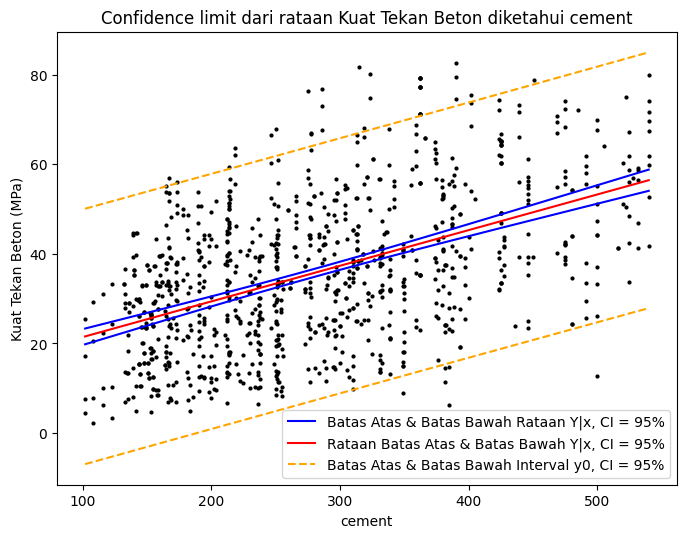

In [10]:
# Regresi komponen cement

x = dataset['cement']
index = 0
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [11]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.24783661989797456
slope: 0.07109553240356534 0.08806513929017792
intercept: 10.897563057266836 15.987493167533195


**Regresi Slag**

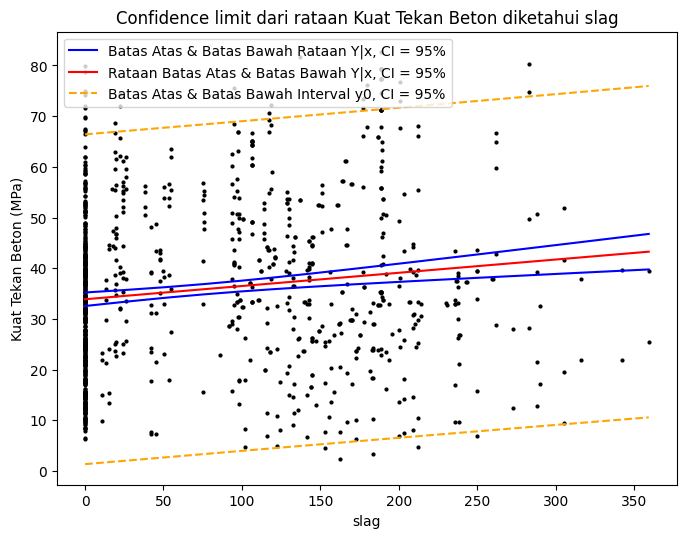

In [12]:
# Regresi komponen slag

x = dataset['slag']
index = 1
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [13]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.018178929755934825
slope: 0.014364282425066204 0.03784805035018559
intercept: 32.55533252383042 35.222316387992


**Regresi Fly Ash**

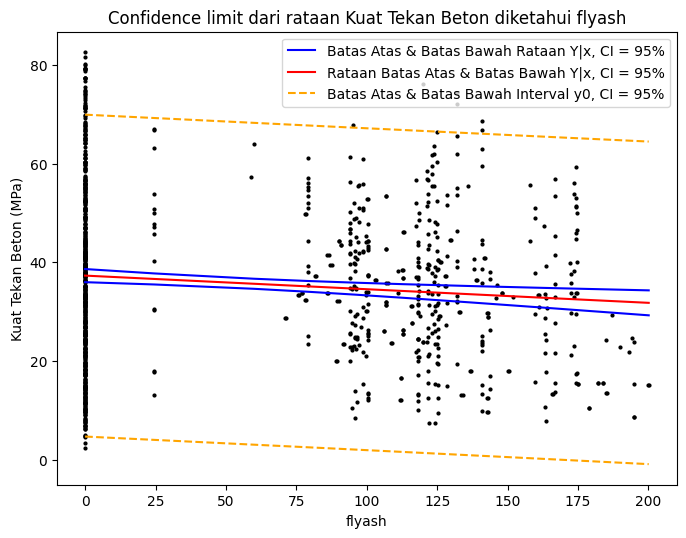

In [14]:
## x var input
# Regresi komponen flay ash

x = dataset['flyash']
index = 2
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [15]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.011184102321049716
slope: -0.04349264101803943 -0.011719766695653853
intercept: 35.98208378620074 38.645707790626524


**Regresi Water**

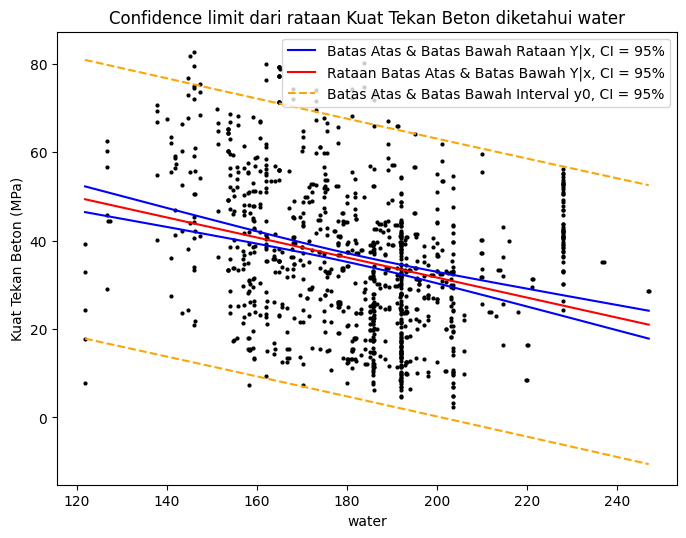

In [16]:
# Regresi komponen water

x = dataset['water']
index = 3
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)

In [17]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.08388749769804527
slope: -0.27241152506161054 -0.18075800473264259
intercept: 68.58040732343831 85.33627461423295


**Regresi Superplasticizer**

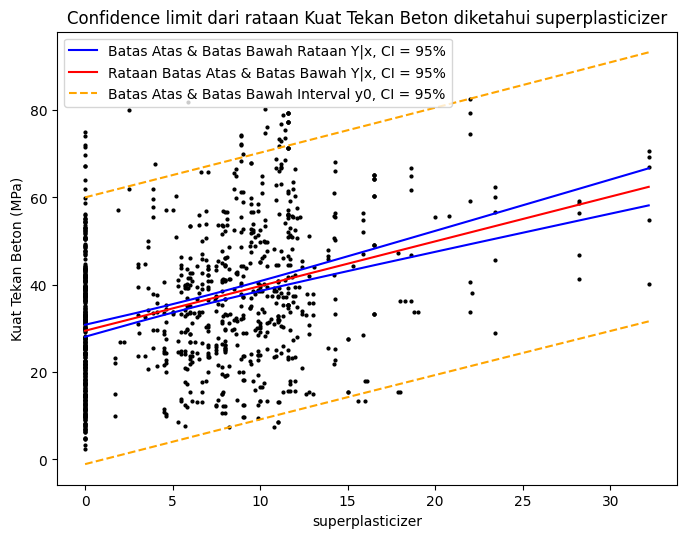

In [18]:
# Regresi komponen Superplasticizer

x = dataset['superplasticizer']
index = 4
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [19]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.13401370771572152
slope: 0.8644643419753647 1.1830016093047662
intercept: 28.094577976497497 30.837513866763608


**Regresi Coarseaggregate**

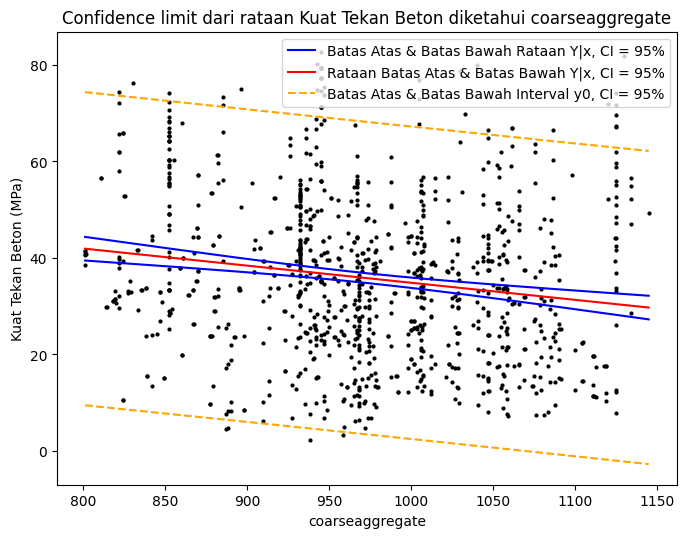

In [20]:

# Regresi komponen AgregatKasar

x = dataset['coarseaggregate']
index = 5
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x.values, y, sxx, b0, b1, x_mean, t_value, s, index)



In [21]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.027203427047105655
slope: -0.048406161630032835 -0.02246753595549239
intercept: 57.63686000360954 82.9534244910401


**Regresi Fineaggregate**

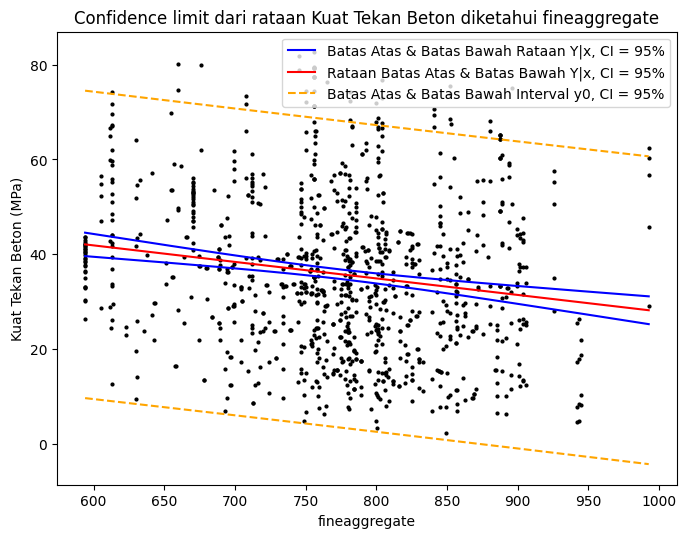

In [22]:

x = dataset['fineaggregate']
index = 6
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [23]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.027969634795134812
slope: -0.04741952963725826 -0.022274389106329433
intercept: 52.99694701176368 72.55283081199737


**Regresi Age (Beton)**

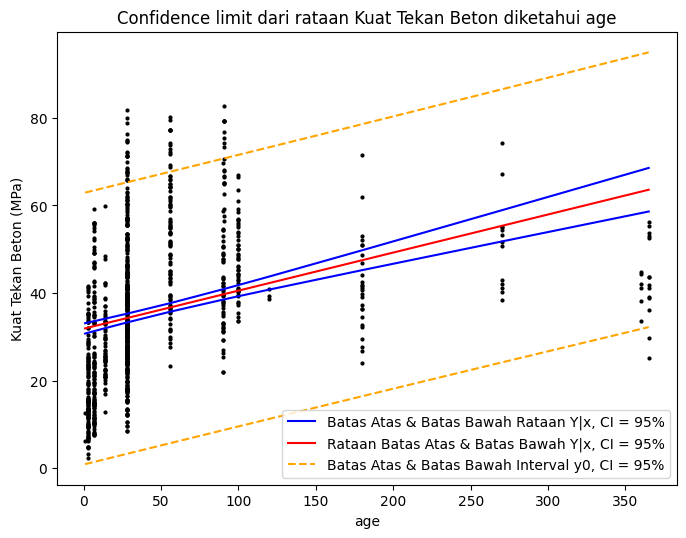

In [24]:


# Regresi komponen Age

x = dataset['age']
index = 7
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)
plot_regression(x, y, sxx, b0, b1, x_mean, t_value, s, index)



In [25]:
batas_bawah = []
batas_atas = []
mean_x_y = []
for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_value*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)


r2 = calculate_r2(calculate_syy_hat(y, mean_x_y), syy)
print("r2:", r2)

slope_margin = calculate_slopemargin(t_value, s, sxx)
slope_a = b1 + slope_margin
slope_b = b1 - slope_margin

print("slope:", slope_a, slope_b)

intercept_margin = calculate_interceptmargin(n, x, t_value, s, sxx)
intercept_a = b0 + intercept_margin
intercept_b = b0 - intercept_margin

print("intercept:", intercept_a, intercept_b)

r2: 0.10815745064203297
slope: 0.07168796595510638 0.1022577417960456
intercept: 30.655589775692597 33.03760000396548


<h1>Pertanyaan Laporan Singkat</h1>

**Bagian B**

In [26]:
x = dataset['cement']
x_test = 400
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)


b_a = (b0 + b1*x_test) - t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))
b_b = (b0 + b1*x_test) + t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))

print(f"Prediksi kuat tekan beton (y) dengan semen 400kg/m3 dengan tingkat kepercayaan 95% adalah: {b_b} < y < {b_a}")

Prediksi kuat tekan beton (y) dengan semen 400kg/m3 dengan tingkat kepercayaan 95% adalah: 16.798900976781397 < y < 73.75042392551595


**Bagian C**

In [27]:
x = dataset['cement']
x_test = 200
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)


b_a = (b0 + b1*x_test) - t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))
b_b = (b0 + b1*x_test) + t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))

print(f"Prediksi kuat tekan beton (y) dengan semen 200kg/m3 dengan tingkat kepercayaan 95% adalah: {b_b} < y < {b_a}")

Prediksi kuat tekan beton (y) dengan semen 200kg/m3 dengan tingkat kepercayaan 95% adalah: 0.8923576110542122 < y < 57.824832952494475


**Bagian D**

In [28]:
def plot_regression_test(x, y, sxx, b0, b1, x_mean, t_0025, s):
    batas_atas = []
    batas_bawah = []
    mean_x_y = []
    y0_batas_atas = []
    y0_batas_bawah = []
    for i in range(0,len(x)):
        b_b = (b0 + b1*x[i]) - t_0025*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_bawah.append(b_b)
        b_a = (b0 + b1*x[i]) + t_0025*s*math.sqrt((1/len(x))+(x[i]-x_mean)**2/(sxx))
        batas_atas.append(b_a)
        mean_x_y.append((b_a-b_b)/2 + b_b)
        y0_b_b = (b0 + b1*x[i]) - t_0025*s*math.sqrt(1+(1/len(x))+(x[i]-x_mean)**2/(sxx))
        y0_batas_bawah.append(y0_b_b)
        y0_b_a = (b0 + b1*x[i]) + t_0025*s*math.sqrt(1+(1/len(x))+(x[i]-x_mean)**2/(sxx))
        y0_batas_atas.append(y0_b_a)

    figure(figsize=(9, 7), dpi=100)
    
    plt.scatter(x,y,s=4,c='black')
    plt.plot(x,batas_atas,c='blue',label='Batas Atas & Batas Bawah Rataan Y|x, CI = 95%')
    plt.plot(x,batas_bawah,c='blue')
    plt.plot(x,mean_x_y,c='red',label='Rataan Batas Atas & Batas Bawah Y|x, CI = 95%')
    plt.plot(x,y0_batas_atas,c='orange',linestyle='dashed',label='Batas Atas & Batas Bawah Interval y0, CI = 95%')
    plt.plot(x,y0_batas_bawah,c='orange',linestyle='dashed')
    left, right  = plt.xlim()
    up, down = plt.ylim()
    plt.title(f'Confidence limit dari rataan Semen (Kg) diketahui Kuat Tekan Beton (MPa)')
    plt.xlabel('Kuat Tekan Beton (MPa)')
    plt.ylabel('Semen (Kg)')
    plt.legend()

In [29]:
dataset = dataset.sort_values(by="csMPa", ascending=True)

y = dataset['cement']
y_mean = y.mean()
sum_y = y.sum()
syy = calculate_syy(y, y_mean)

x = dataset['csMPa']
x_test = 80
n = x.size
dof = n - 1

x_mean = x.mean()
sum_x = x.sum()

sxx = calculate_sxx(x, x_mean)
sxy = calculate_sxy(x, x_mean, y, y_mean)
b1 = calculate_b1(sxy, sxx)
b0 = calculate_b0(x_mean, y_mean, b1)
s = calculate_s(x, y, syy, sxy, b1)
t_value = t.ppf(0.025, dof)

b_a = (b0 + b1*x_test) - t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))
b_b = (b0 + b1*x_test) + t_value*s*math.sqrt(1+(1/len(x))+(x_test-x_mean)**2/(sxx))

print(f"Prediksi semen (y) dengan kuat tekan beton di atas 80 MPa dengan tingkat kepercayaan 95% adalah: {b_b} < y < {b_a}")

Prediksi semen (y) dengan kuat tekan beton di atas 80 MPa dengan tingkat kepercayaan 95% adalah: 240.13575619679182 < y < 597.3917526548543


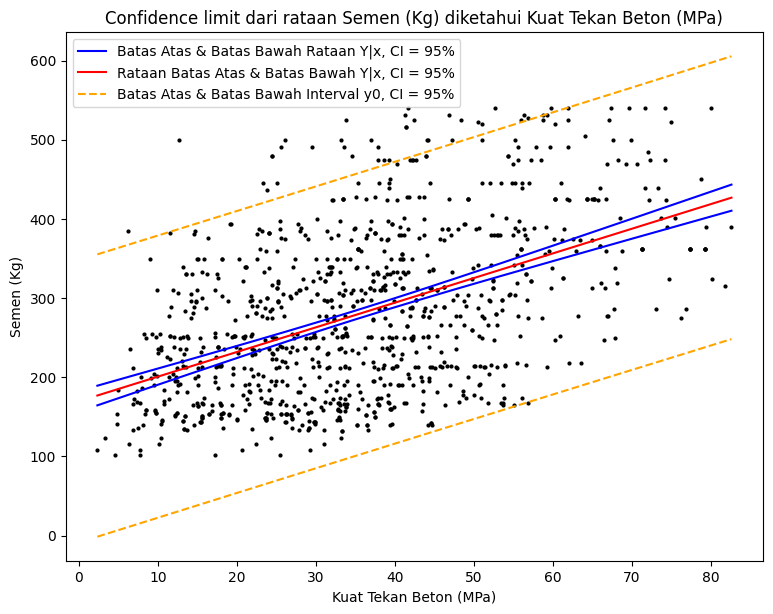

In [30]:
plot_regression_test(x.values, y, sxx, b0, b1, x_mean, t_value, s)

<h3>

<i>“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun menerima bantuan apapun-baik lisan, tulisan, maupun elektronik-di dalam ujian ini selain daripada apa yang telah diizinkan oleh pengajar, dan tidak menyebarkan baik soal maupun jawaban ujian kepada pihak lain. ”</i>

</h3>